In [113]:
import numpy as np
import pandas as pd 
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
def print_conf_matrix_stats(conf_mtrx):
    
    if len(conf_mtrx) != 2 or len(conf_mtrx[0]) != 2:
        print("only 2x2 confusion matrices are supported.")
        return

    TN, FP = conf_mtrx[0]
    FN, TP = conf_mtrx[1]

    total = TN + FP + FN + TP
    accuracy = (TP + TN) / total 
    precision = TP / (TP + FP) 
    recall = TP / (TP + FN) 
    f1_score = 2 * precision * recall / (precision + recall) 
    
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1_score:.4f}")

In [115]:
df = pd.read_csv('default.csv')

df.drop('Unnamed: 0', axis = 1, inplace = True)

df['default'] = df['default'].map({"Yes" : 1, "No" : 0})

df['student'] = df['student'].map({"Yes" : 1, "No" : 0})

print(df.head())

   default  student      balance        income
0        0        0   729.526495  44361.625074
1        0        1   817.180407  12106.134700
2        0        0  1073.549164  31767.138947
3        0        0   529.250605  35704.493935
4        0        0   785.655883  38463.495879


In [116]:
# (5)

train, test = train_test_split(df, test_size=0.5)

X_train = train[['balance', 'income']]
y_train = train['default']

X_test = test[['balance', 'income']]
y_test = test['default']

model = LogisticRegression().fit(X_train, y_train)

# predict
y_pred_lr = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])

print(confusion_matrix_df)

print()

print_conf_matrix_stats(confusion_matrix)

           Predicted: 0  Predicted: 1
Actual: 0          4825            21
Actual: 1           108            46

Accuracy : 0.9742
Precision: 0.6866
Recall   : 0.2987
F1 Score : 0.4163


In [117]:
train, test = train_test_split(df, test_size=0.5)

X_train = train[['balance', 'income', 'student']]
y_train = train['default']

X_test = test[['balance', 'income', 'student']]
y_test = test['default']

model = LogisticRegression().fit(X_train, y_train)

# predict
y_pred_lr = model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])

print(confusion_matrix_df)

print()

print_conf_matrix_stats(confusion_matrix)

           Predicted: 0  Predicted: 1
Actual: 0          4817            23
Actual: 1           111            49

Accuracy : 0.9732
Precision: 0.6806
Recall   : 0.3063
F1 Score : 0.4224


In [118]:
# (6.a) 

f = 'default ~ balance + income'

model = smf.logit(formula=f, data=train).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.073982
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Sun, 03 Aug 2025   Pseudo R-squ.:                  0.5081
Time:                        15:12:05   Log-Likelihood:                -369.91
converged:                       True   LL-Null:                       -751.93
Covariance Type:            nonrobust   LLR p-value:                1.236e-166
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.5202      0.676    -18.532      0.000     -13.844     -11.196
balance        0.0063      0.000     17.686      0.000       0.006       0.007
income      2.106e-05   7.27e-06      2.896      0.004    6.81e-06    3.53e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [119]:
# (6.b)

def boot_fn(df, indices):
    
    sample = df.iloc[indices]

    f = 'default ~ income + balance'
    
    model = smf.logit(formula = f, data = sample).fit()
    
    return model.params[['income', 'balance']].values

In [120]:
# (6.c)

n_bootstraps = 10

boot_coefs = np.zeros((n_bootstraps, 2))  # [income, balance]

for i in range(n_bootstraps):
    indices = np.random.choice(len(df), size=len(df), replace=True)
    boot_coefs[i] = boot_fn(df, indices)

se_income, se_balance = boot_coefs.std(axis=0)

print(f"Bootstrap SE for income:  {se_income:.6f}")
print(f"Bootstrap SE for balance: {se_balance:.6f}")    

Optimization terminated successfully.
         Current function value: 0.072580
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076950
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078993
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.074343
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078179
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078371
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.083806
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078510
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079593
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

In [121]:
# (7) 

df = pd.read_csv('weekly.csv')

df.drop('Unnamed: 0', axis=1, inplace=True)

df['Direction'] = df['Direction'].map({"Up" : 1, "Down" : 0})

print(df.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today  Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270          0
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576          0
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514          1
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712          1
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178          1


In [122]:
# (7.a)  Fit a logistic regression model that predicts Direction using Lag1 and Lag2

f = 'Direction ~ Lag1 + Lag2'

model = smf.logit(formula=f, data=df).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.683297
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Sun, 03 Aug 2025   Pseudo R-squ.:                0.005335
Time:                        15:12:07   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01848
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
==============================================================================
"""

In [123]:
# (7.b) Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.

df_exclude_first = df.iloc[1:]  # or df.drop(index=0)

model_exclude_first = smf.logit(formula=f, data=df_exclude_first).fit()

print(model_exclude_first.summary())


Optimization terminated successfully.
         Current function value: 0.683147
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1088
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            2
Date:                Sun, 03 Aug 2025   Pseudo R-squ.:                0.005387
Time:                        15:12:08   Log-Likelihood:                -743.26
converged:                       True   LL-Null:                       -747.29
Covariance Type:            nonrobust   LLR p-value:                   0.01785
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.

In [124]:
# (7.c)

df_first = df.iloc[[0]]

prediction = (model_exclude_first.predict(df_first) > 0.5)

actual_direction = [df.loc[0, 'Direction']]

# metrics.confusion_matrix(y_true, y_pred)

confusion_matrix = metrics.confusion_matrix(actual_direction, prediction)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: Down', 'Predicted: Up'], index=['Actual: Down', 'Actual: Up'])

print(confusion_matrix_df)

              Predicted: Down  Predicted: Up
Actual: Down                0              1
Actual: Up                  0              0


In [125]:
# (7.d)

y_true = []
y_pred = []

for i in range(len(df)):
    train_df = df.drop(index=i)
    test_df = df.iloc[[i]]

    f = 'Direction ~ Lag1 + Lag2'
    model = smf.logit(formula=f, data=train_df).fit(disp=0)

    pred_direction = (model.predict(test_df) > 0.5)

    true_direction = df.loc[i, 'Direction']

    y_true.append(true_direction)
    y_pred.append(pred_direction)

# metrics.confusion_matrix(y_true, y_pred)

confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

confusion_matrix_df = pd.DataFrame(confusion_matrix, columns=['Predicted: Down', 'Predicted: Up'], index=['Actual: Down', 'Actual: Up'])

print(confusion_matrix_df)   

              Predicted: Down  Predicted: Up
Actual: Down               34            450
Actual: Up                 40            565


In [126]:
# (8.a) what is n and what is p ?

rng = np.random. default_rng (1)
x = rng.normal(size =100)
y = x - 2 * x**2 + rng.normal(size =100)

# n = 100 and p = 2 

Text(0, 0.5, '$Y$')

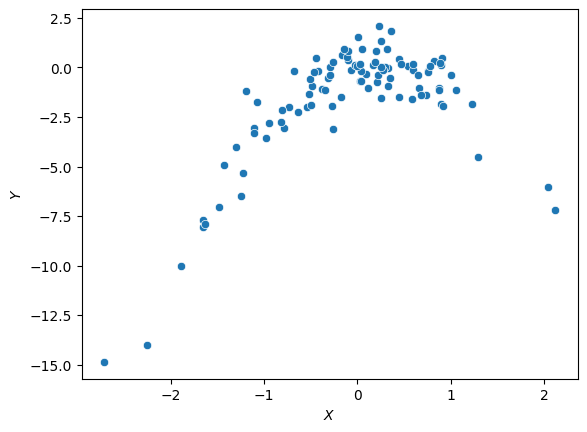

In [127]:
# (8.b) Create a scatterplot of X against Y

ax = sns.scatterplot(x=x, y=y)
plt.xlabel('$X$')
plt.ylabel('$Y$')

In [128]:
# The shape of the plot has two extrema and hence the function must be at least a cubic or quartic polynomial.

In [129]:
# (8.c) 

df = pd.DataFrame({'x1' : x, 'x2' : x**2, 'x3' : x**3, 'x4' : x**4, 'y' : y})

print(df.head())

         x1        x2        x3        x4         y
0  0.345584  0.119428  0.041273  0.014263 -0.544554
1  0.821618  0.675056  0.554639  0.455701  0.333950
2  0.330437  0.109189  0.036080  0.011922 -0.013532
3 -1.303157  1.698219 -2.213046  2.883947 -4.030442
4  0.905356  0.819669  0.742092  0.671858  0.484861


In [130]:
def perform_loocv(df, f, seed):

    errors = []
    
    for i in range(len(df)):
        train_df = df.drop(index=i)
        test_df = df.iloc[[i]]
    
        model = smf.ols(formula = f, data = train_df).fit()

        prediction = model.predict(test_df)
        
        actual = test_df['y'].values[0]
        
        error = (prediction.values[0] - actual)**2

        # prediction and test_df['y'] are pandas series with one row
        
        errors.append(error)

    mse = np.mean(errors)
    return mse  

In [131]:
f1 = 'y ~ x1'
f2 = 'y ~ x1 + x2'
f3 = 'y ~ x1 + x2 + x3'
f4 = 'y ~ x1 + x2 + x3 + x4'

formulae = [f1, f2, f3, f4]

loocv_err = []

for f in formulae:
    err = perform_loocv(df, f, 1)
    loocv_err.append(err)

print(*loocv_err)

6.633029839181984 1.1229368563419686 1.3017965489358863 1.3323942694179332


In [132]:
# (8.d) Repeat (c) using another random seed

loocv_err = []

for f in formulae:
    err = perform_loocv(df, f, 7)
    loocv_err.append(err)

print(*loocv_err)

6.633029839181984 1.1229368563419686 1.3017965489358863 1.3323942694179332


In [133]:
# The test error estimates are identical
# This is to be expected as LOOCV is deterministic

In [134]:
# (8.e) 2nd order polynomial has the smallest loocv error and it's expected 

In [135]:
# (9) 

df = pd.read_csv('BostonHousing.csv')

print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  CAT. MEDV  
0   4.98  24.0          0  
1   9.14  21.6          0  
2   4.03  34.7          1  
3   2.94  33.4          1  
4   5.33  36.2          1  


In [136]:
# (9.a) provide an estimate for the population mean of medv

df_MEDV = df[['MEDV']]

print(df_MEDV.mean().values[0])

22.532806324110677


In [137]:
# (9.b) provide an estimate for the standard error of sample mean

l = len(df_MEDV) ** 0.5

sample_standard_deviation = df_MEDV.std().values[0]

standard_error = sample_standard_deviation / l

print(standard_error)

0.40886114749753505


In [138]:
# (9.c) Now estimate the standard error using the bootstrap

# The standard deviation of the bootstrap estimates is the standard error

rho = 10000

medv = df['MEDV'].values

bootstrap_means = []

for _ in range(rho):
    sample = np.random.choice(medv, size=len(medv), replace=True)
    bootstrap_means.append(np.mean(sample))

bootstrap_means = np.array(bootstrap_means)

standard_error = bootstrap_means.std()

print(standard_error)

0.413018479146135


In [139]:
# (9.d) 95 % confidence interval 

print(df_MEDV.mean().values[0] - 2 * std_errors.mean(), df_MEDV.mean().values[0] + 2 * std_errors.mean())

21.715084029115605 23.35052861910575


In [140]:
# (9.e) Estimate for the median value of medv in the population

print(np.median(df['MEDV']))

21.2


In [141]:
# (9.f) Estimate the standard error of medv using the bootstrap

rho = 10000

medv = df['MEDV'].values

medians = []

for _ in range(rho):
    sample = np.random.choice(medv, size=len(medv), replace=True)

    medians.append(np.median(sample))

medians = np.array(medians)

standard_error = medians.std()
    
print(standard_error)

0.37998801293593426


In [142]:
# (9.g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts

tenth_percentile = np.percentile(df['MEDV'], 10)

print(tenth_percentile)

12.75


In [143]:
# (9.h) Use the bootstrap to estimate the standard error of tenth percentile of medv

rho = 10000

medv = df['MEDV'].values

tenth_percentiles = []

for _ in range(rho):
    sample = np.random.choice(medv, size=len(medv), replace=True)

    tenth_percentiles.append(np.percentile(sample, 10))

tenth_percentiles = np.array(tenth_percentiles)

standard_error = tenth_percentiles.std()
    
print(standard_error)

0.5021828590264705
